[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [23]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [24]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


FileNotFoundError: [Errno 2] No such file or directory: 'my_saved_model_v1.sav'

(Optional) Load a second model if you want to do comparative testing

In [ ]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [ ]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

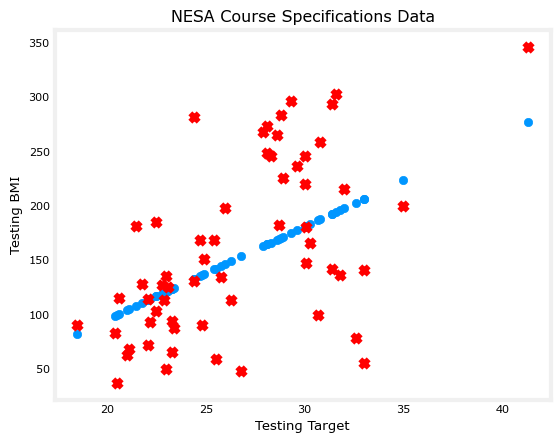

In [ ]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [ ]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.3013702234773944


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [ ]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : abs(model_A.predict(x_test).round(2) - y_test)**2
})
print(table)
cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()

print(f"The cost or average loss of this model is {cost}")

     DoB    DoT  Predicted result        Loss
0   29.6  236.0        177.067270   3472.7449
1   30.1  180.0        181.336595      1.7956
2   25.4  168.0        141.204940    718.2400
3   22.2   93.0        113.881260    435.9744
4   24.9  151.0        136.935615    197.6836
5   26.3  113.0        148.889725   1288.0921
6   23.1  125.0        121.566045     11.7649
7   22.1   72.0        113.027395   1683.4609
8   20.5   37.0         99.365556   3890.0169
9   33.0  141.0        206.098680   4238.0100
10  33.0   55.0        206.098680  22831.2100
11  31.4  293.0        192.436840  10112.3136
12  28.6  265.0        168.528620   9306.4609
13  22.5  103.0        116.442855    180.6336
14  27.9  268.0        162.551565  11119.7025
15  24.8   90.0        136.081750   2123.3664
16  21.8  128.0        110.465800    307.3009
17  32.0  215.0        197.560030    304.1536
18  22.8  127.0        119.004450     64.0000
19  24.4  281.0        132.666290  22001.7889
20  29.3  296.0        174.505675 

You may want to do some manual predictions to understand your model.

In [ ]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-74.82290381]
[-67.13811884]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [ ]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -75.67676881111146
Coefficient: [8.53864997]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [ ]:
mx_col = ['BMI','BP','FDR']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

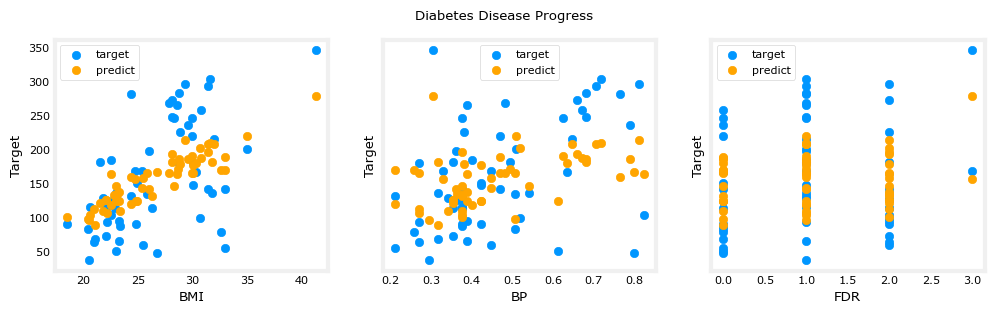

In [ ]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [ ]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.410478742428076


In [ ]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[-82.18431591]
[-33.74320048]


In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Loss'] = abs(model_C.predict(mx_test).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 1824.3578669491524
     BMI        BP  FDR  Target  Predicted result        Loss
0   29.6  0.788235  0.0   236.0        186.258543   2474.0676
1   30.1  0.270588  1.0   180.0        165.469883    211.1209
2   25.4  0.447059  1.0   168.0        143.568595    596.8249
3   22.2  0.270588  1.0    93.0        106.798412    190.4400
4   24.9  0.423529  0.0   151.0        124.476715    703.3104
5   26.3  0.376471  0.0   113.0        131.406318    338.9281
6   23.1  0.364706  2.0   125.0        134.062809     82.0836
7   22.1  0.352941  2.0    72.0        125.769072   2891.2129
8   20.5  0.294118  1.0    37.0         95.906842   3470.3881
9   33.0  0.470588  0.0   141.0        188.101413   2218.4100
10  33.0  0.211765  0.0    55.0        169.028112  13002.8409
11  31.4  0.705882  1.0   293.0        207.202508   7361.6400
12  28.6  0.388235  1.0   265.0        162.999413  10404.0000
13  22.5  0.823529  2.0   103.0        163.418509   3650.5764
14  27.9 

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -91.66067877886636
Coefficient: [ 7.42676854 73.69230087 13.64455932]


#### Step 10. Polynomial Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
model_filename = 'my_saved_model_v3.sav'
poly_filename = 'my_saved_poly_v3.pkl'

model_D = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

In [ ]:
mx_col = ['BMI']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

In [ ]:
poly_features = poly.fit_transform(mx_test)

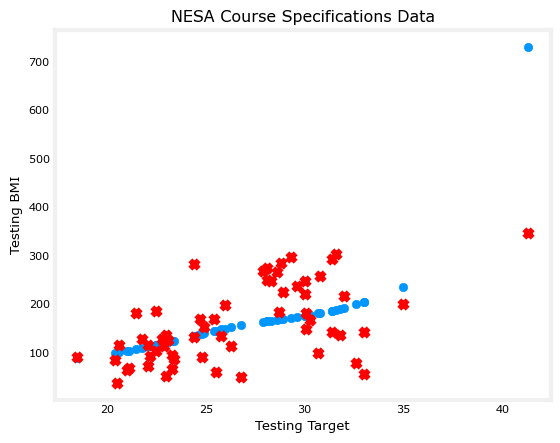

In [ ]:
y_pred = model_D.predict(poly_features)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

In [ ]:
test_score = model_D.score(poly_features, my_test)
print(f'Training data score: {test_score}')

Training data score: -0.09851275292863293


In [ ]:
new_poly_feature = poly.fit_transform([[0.1]])
print(model_D.predict(new_poly_feature))

[80.03493372]


In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_D.predict(poly_features)
data['Loss'] = abs(model_D.predict(poly_features).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 3399.4674618644067
     BMI  Target  Predicted result         Loss
0   29.6   236.0        172.840737    3989.1856
1   30.1   180.0        175.873214      17.0569
2   25.4   168.0        143.392142     605.6521
3   22.2    93.0        112.703231     388.0900
4   24.9   151.0        138.722149     150.7984
5   26.3   113.0        151.219586    1460.7684
6   23.1   125.0        121.161489      14.7456
7   22.1    72.0        111.802400    1584.0400
8   20.5    37.0         98.929281    3835.3249
9   33.0   141.0        203.646819    3925.0225
10  33.0    55.0        203.646819   22096.8225
11  31.4   293.0        185.555617   11543.3536
12  28.6   265.0        167.071428    9590.2849
13  22.5   103.0        115.458357     155.2516
14  27.9   268.0        162.821189   11062.8324
15  24.8    90.0        137.767541    2281.9729
16  21.8   128.0        109.158690     354.9456
17  32.0   215.0        191.420646     556.0164
18  22.8   127.0        118

#### Step 11

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.